#**MINI PROJETO**

Escola: SoulCode Academy

Curso: PreparaTech - AD4

Assunto: Mini Projeto

Professor(a): Douglas Ribeiro

Aluno: Vitor Kawasaki

https://docs.google.com/spreadsheets/d/e/2PACX-1vRbytUbnwYGh12Ty2SHxIegfIRUAcuqykVFovpHsy242SXZRl6oj2XfgbhWeOWJWHq0SiWv0-xGolZh/pub?gid=459804630&single=true&output=csv

#Importação da biblioteca Pandas (pd)

In [ ]:
# Importação da biblioteca Pandas
import pandas as pd

##1 - BALANCO PATRIMONIAL DA EMPRESA (imagem)

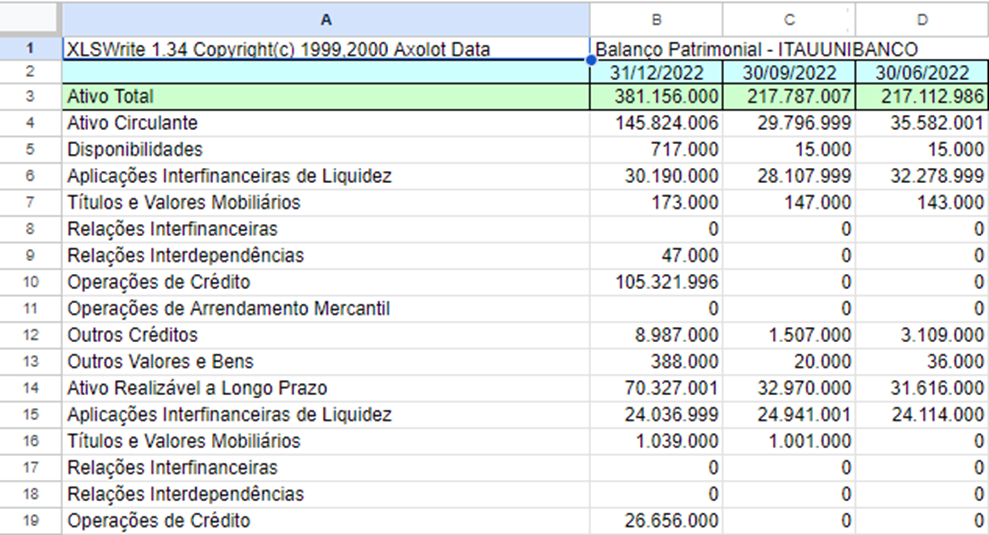

###1.1 - Extração do Balanço Patrimonial (pd.read_csv)
* da empresa previamente extraído da fonte e
Armazenado em nuvem
* Encurtador URL
https://tinyurl.com/app

In [ ]:
bp = pd.read_csv('https://tinyurl.com/2p8ujx52',header=1)
bp.head(3)

###1.2 - Transposição da tabela (transpose)

* organizando os campos nas colunas e os registros por datas nas linhas


In [ ]:
bp = bp.transpose()
# configuração para exibir todas as colunas
pd.set_option('display.max_columns',None)
bp.head(3)

###1.3 - Extração dos campos do Balanço (iloc)
 * necessários para a análise e armazenamento em bpr


In [ ]:
bpr = bp.iloc[:,[0,49]]
bpr.head(3)

###1.4 - Renomeando as colunas de bpr (rename)

In [ ]:
bpr = bpr.rename(columns={0:'ativo',49:'pl'})
bpr.head(3)

###1.5 - Exclusão da linha que não será utilizada (drop)

In [ ]:
bpr = bpr.drop(bpr.index[[0]])
bpr.head(3)

###1.6 - Verificando os tipos de dados (dtypes)

In [ ]:
bpr.dtypes

###1.7 - Transformação dos tipos de dados (apply)
* função que aplica em todo o DataFrame

In [ ]:
bpr = bpr.apply(pd.to_numeric)
bpr.dtypes

###1.8 - Verificação do Index (index)

In [ ]:
bpr.index

###1.9 - Resetando o index (reset)

In [ ]:
bpr = bpr.reset_index()
bpr.head(3)

###1.10 - Verificar o tipo de dados (dtypes)

In [ ]:
bpr.dtypes

###1.11 - Renomeando a coluna index para período (rename)
* Transformando a coluna de datas para o formato datas
* no Pandas, ele apenas enxerga ano-mes-dia (padrão)

In [ ]:
bpr = bpr.rename(columns={'index':'periodo'})
# Transformando a coluna de datas para o formato datas
bpr['periodo']=pd.to_datetime(bpr['periodo'].astype(str), format='%d/%m/%Y')
bpr.head(3)

###1.12 - Verificando a existência de valores nulos (isna)

In [ ]:
print(bpr.isna().sum())

###1.13 - Verificando os tipos de dados (dtypes)

In [ ]:
bpr.dtypes

##2 - DEMONSTRAÇÃO DE RESULTADO DO EXERCICIO - DRE (imagem)


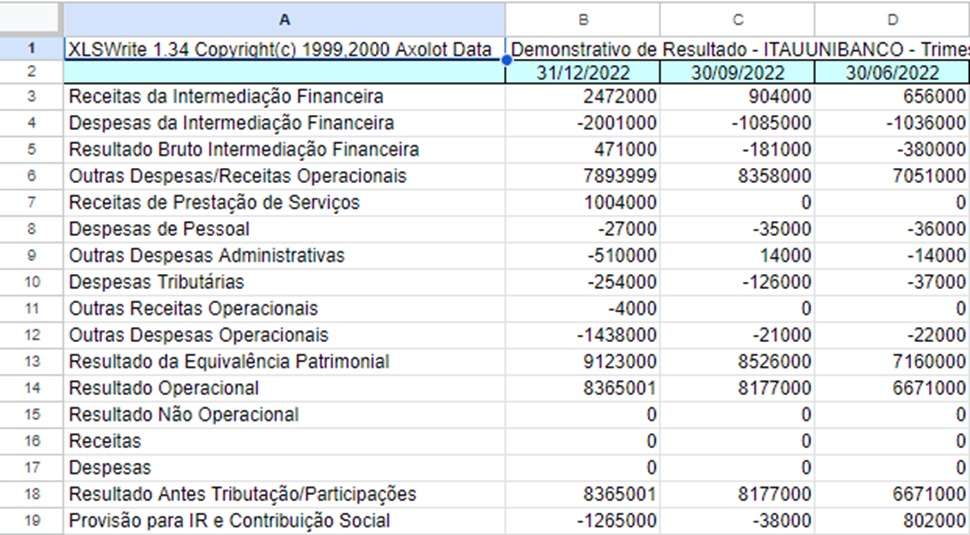

###2.1 - Extração da DRE da empresa (pd.read_csv)
* previamente extraída do fonte e
Armazenado em nuvem

In [ ]:
dre = pd.read_csv('https://tinyurl.com/4cytpdyu',header=1)
dre.head(3)

###2.2 - Transposição da tabela (transpose)
* organizando os campos nas colunas e os registros por datas nas linhas

In [ ]:
dre = dre.transpose()
# Configuração para exibir todas as colunas
pd.set_option('display.max_columns',None)
dre.head(3)

###2.3 - Extração dos campos do Balanço (iloc)
* necessários para a análise e armazenamento em drer

In [ ]:
drer = dre.iloc[:,[21]]
drer.head(3)

###2.4 - Renomeando as colunas de drer (rename)

In [ ]:
drer = drer.rename(columns={21:'resultado'})
drer.head(3)

###2.5 - Exclusão da linha que não será utilizada (drop)

In [ ]:
drer = drer.drop(drer.index[[0]])
drer.head(3)

###2.6 - Verificando os tipos de dados das colunas (dtypes)

In [ ]:
drer.dtypes

###2.7 - Transformação dos tipos de dados das colunas para numérico (pd.to_numeric)

In [ ]:
drer = drer.apply(pd.to_numeric)
drer.dtypes

###2.8 - Verificação do índice e seu respectivo tipo (index)

In [ ]:
drer.index

###2.9 - Resetando o ìndice (reset)

In [ ]:
drer = drer.reset_index()
drer.head(3)

###2.10 - Renomeando a coluna index para periodo (rename)

In [ ]:
drer = drer.rename(columns={'index':'periodo'})
# Tranformando a coluna de datas para o formato datas
drer['periodo']=pd.to_datetime(drer['periodo'].astype(str), format='%d/%m/%Y')
drer.head(3)

###2.11 - Verificando a existência de valores nulos (isna)

In [ ]:
print(drer.isna().sum())

###2.12 - Criando o dataframe com as informações da empresa (pd.merge)
* necessárias para análise (limpo e transformado)

In [ ]:
itau = pd.merge(bpr, drer, how = 'inner', on = 'periodo')
itau.head(3)

###2.13 - Criando o indicador ROE

In [ ]:
itau['roe'] = itau['resultado'] / itau['pl']
itau.head()

###2.14 - Verificando a existência de valores nulos (isna)

In [ ]:
print(itau.isna().sum())

##3 - DADOS ECONÔMICOS


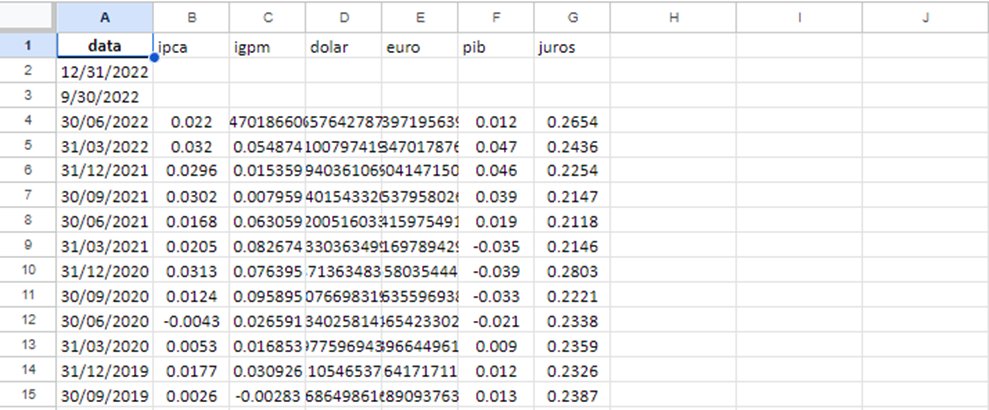

###3.1 - Extração de uma base (pd.read_csv)
* de indicadores econômicos previamente extraídos e Armazenado em nuvem

In [ ]:
kpi = pd.read_csv('https://tinyurl.com/2p9fe3wv',header=0)
kpi.head(3)

###3.2 - Verificando os tipos de dados das colunas (dtypes)

In [ ]:
kpi.dtypes

###3.3 - Renomeando a coluna data para periodo (rename)

In [ ]:
kpi = kpi.rename(columns={'data':'periodo'})
# Transformado a coluna periodo em tipo de data
kpi['periodo']=pd.to_datetime(kpi['periodo'].astype(str), format='%d/%m/%Y')
kpi.head(3)

###3.4 - Criando um dataframe (pd.merge)
* que une as informações da empresa com as informações econômicas

In [ ]:
df = pd.merge(itau, kpi, how = 'inner', on = 'periodo')
df.head(3)

###3.5 - Verificando a existência de valores nulos (isna)

In [ ]:
print(df.isna().sum())

###3.6 - Tratamento dos valores nulos (drop)

In [ ]:
df.drop([0,1],inplace=True)
df.head(3)

###3.7 - Verificando a existência de valores nulos (isna)

In [ ]:
print(df.isna().sum())

###3.8 - Reconfingurando e ordenando o índice (df.reset_index)

In [ ]:
df = df.reset_index()
df.head(3)

###3.9 - Descartando a coluna antiga do índice (drop)

In [ ]:
df.drop('index', axis='columns',inplace=True)
df.head(3)

###3.10 - Conversão dos números da coluna juros do formato ao ano para o formato trismestral

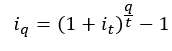

In [ ]:
df['juros'] = ((1 + df['juros'])**(1/4)) - 1
df.head(3)

###3.11 - Exportanto para o Excel (pd.ExcelWriter)

In [ ]:
datatoexcel = pd.ExcelWriter('indicadores.xlsx')
df.to_excel(datatoexcel)
datatoexcel.save()

###3.12 - Exportando o df para o formato CSV (df.to_csv)

In [ ]:
df.to_csv('ind', index = False)

DASHBOARD LOOKER
https://lookerstudio.google.com/u/0/reporting/569ff12a-4f78-473c-b475-3d169ed35698/page/HycOD
